## Inicializando

In [1]:
import sys
sys.path.append('../')

from gerador import datagen, pypsg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Dê preferência a uma imagem Docker
# https://psg.gsfc.nasa.gov/helpapi.php#calling
psg = pypsg.PSG(server_url='https://psg.gsfc.nasa.gov/api.php', timeout_seconds = 20)

Testing connection to PSG at https://psg.gsfc.nasa.gov/api.php ...
Connected to PSG with success.


## Criando parâmetros aleatórios

In [8]:
# Chamadas de API do PSG são limitadas por 100/dia
# Veja documentação do PSG: https://psg.gsfc.nasa.gov/help.php#handbook
caminho = '../'
datagen.gerar_conjunto_dados(psg = psg, n_planetas = 10, datagen_dir = caminho, 
                             nome_arquivo = 'datagen', quer_nuvem = False, 
                             verbose = True)


***** MODO DE GERAÇÃO DE DADOS *****
> Gerando exoplaneta 1/10...
> Gerando exoplaneta 2/10...
> Gerando exoplaneta 3/10...
> Gerando exoplaneta 4/10...
> Gerando exoplaneta 5/10...
> Gerando exoplaneta 6/10...
> Gerando exoplaneta 7/10...
> Gerando exoplaneta 8/10...
> Gerando exoplaneta 9/10...
> Gerando exoplaneta 10/10...
> Salvando arquivo...
***** Arquivo salvo com sucesso! *****


In [9]:
dados = caminho + '/data/datagen.parquet'
dados = pd.read_parquet(dados)
dados.head()

,OBJECT,OBJECT-NAME,OBJECT-DATE,OBJECT-DIAMETER,OBJECT-GRAVITY,OBJECT-GRAVITY-UNIT,OBJECT-STAR-DISTANCE,OBJECT-STAR-VELOCITY,OBJECT-SOLAR-LONGITUDE,OBJECT-SOLAR-LATITUDE,...,ATMOSPHERE-AEROS,ATMOSPHERE-ATYPE,ATMOSPHERE-AABUN,ATMOSPHERE-AUNIT,ATMOSPHERE-ASIZE,Wave/freq [um],Total [I/F apparent albedo],Noise,Stellar,Planet
0,Exoplanet,exo0,2017/12/22 15:09,7701.464324694086,4.753881681777378,g,0.6176701288636438,0.0,-218.2064590816922,-34.334426654868224,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[7.6969147e-05, 8.5250674e-05, 8.7228905e-05, ...","[0.0296793, 0.0292973, 0.0288002, 0.028323, 0....","[0.0575808, 0.0575808, 0.0575808, 0.0575808, 0...","[7.69691e-05, 8.52507e-05, 8.72289e-05, 7.6717..."
0,Exoplanet,exo1,2017/12/22 15:09,10733.05068847647,5.34848597990322,g,1.1127510987734772,0.0,38.19570491459871,28.331311045992578,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.040868314, 0.041848871, 0.041600193, 0.0394...","[0.00422203, 0.00421271, 0.0041778, 0.00412797...","[0.0962189, 0.0962189, 0.0962189, 0.0962189, 0...","[0.0408683, 0.0418489, 0.0416002, 0.0394446, 0..."
0,Exoplanet,exo2,2017/12/22 15:09,14741.192156973719,6.024367289785098,g,0.5991451599652862,0.0,114.61661437389387,-30.923371064148675,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.071356119, 0.072422956, 0.072593184, 0.0714...","[0.0169938, 0.0167454, 0.0164181, 0.0160816, 0...","[0.014788, 0.014788, 0.014788, 0.014788, 0.014...","[0.0713561, 0.072423, 0.0725932, 0.0714312, 0...."
0,Exoplanet,exo3,2017/12/22 15:09,14182.320279276277,5.983477172669094,g,0.09163840483425532,0.0,-261.5159362890595,12.297692673845859,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.020611669, 0.023864815, 0.024953931, 0.0225...","[595919000.0, 572106000.0, 545609000.0, 520583...","[3737410.0, 3737410.0, 3737410.0, 3737410.0, 3...","[0.0206117, 0.0238648, 0.0249539, 0.0225267, 0..."
0,Exoplanet,exo4,2017/12/22 15:09,10339.111123501232,5.196367479608373,g,0.2670263374903542,0.0,-34.9502164241718,-76.7068918375072,...,,,,,,"[0.45, 0.4532142857, 0.4564515306, 0.459711898...","[0.015949854, 0.017558481, 0.017750544, 0.0157...","[2946790000.0, 2836970000.0, 2713110000.0, 259...","[59710800.0, 59710800.0, 59710800.0, 59710800....","[0.0159499, 0.0175585, 0.0177505, 0.015763, 0...."


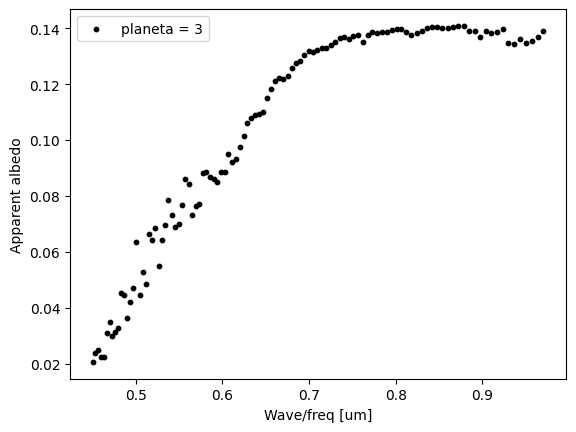

In [24]:
idx = np.random.randint(0, 10)
wave_freq = dados.iloc[idx]['Wave/freq [um]']
total_albedo = dados.iloc[idx]['Total [I/F apparent albedo]']

plt.scatter(wave_freq, total_albedo, label = f'planeta = {idx}', c = 'k', s = 10)
plt.xlabel('Wave/freq [um]'); plt.ylabel('Apparent albedo')
plt.legend()
plt.show()

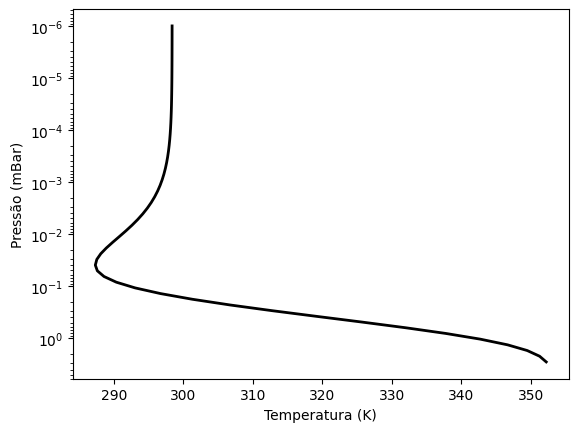

In [25]:
pressoes = []
temperaturas = []

for i in range(60):
    layer_data = dados.iloc[idx][f'ATMOSPHERE-LAYER-{i+1}']
    pressao, temperatura = layer_data.split(',')[:2]
    pressoes.append(float(pressao))
    temperaturas.append(float(temperatura))

plt.plot(temperaturas, pressoes, lw = 2, c = 'k')
plt.ylabel('Pressão (mBar)'); plt.xlabel('Temperatura (K)')
plt.gca().invert_yaxis()
plt.yscale('log')
plt.show()

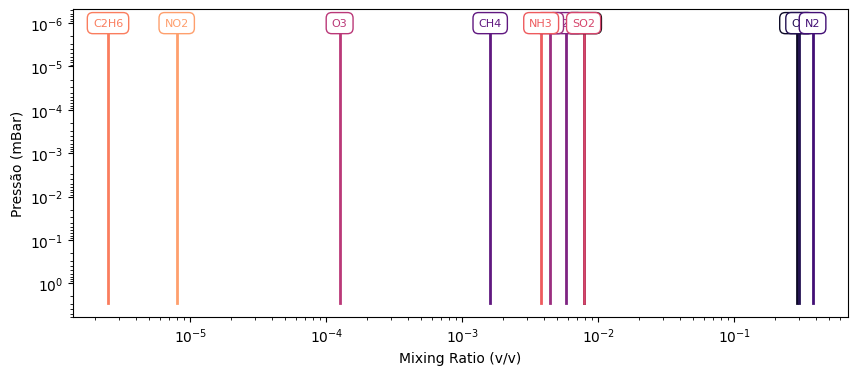

In [26]:
moleculas = dados.iloc[idx]['ATMOSPHERE-LAYERS-MOLECULES'].split(',')
mixing_ratios = [[] for _ in range(len(moleculas))]

cmap = plt.get_cmap('magma')
cores = [cmap(i) for i in np.linspace(0, 0.8, len(moleculas))]

for i in range(60):
    layer_data = dados.iloc[idx][f'ATMOSPHERE-LAYER-{i+1}']
    mixing_values = layer_data.split(',')[2:]
    for j, value in enumerate(mixing_values):
        mixing_ratios[j].append(float(value))

plt.figure(figsize = (10, 4))

for i, mol in enumerate(moleculas):
    plt.loglog(mixing_ratios[i], pressoes, label=f'{mol}', color=cores[i], lw = 2)
    plt.text(mixing_ratios[i][-1], pressoes[-1], mol, color=cores[i], va='center', ha='center',
             bbox=dict(facecolor='white', edgecolor=cores[i], boxstyle='round,pad=0.5'),
             fontsize = 8)

plt.ylabel('Pressão (mBar)'); plt.xlabel('Mixing Ratio (v/v)')
plt.gca().invert_yaxis()
plt.show()